<a href="https://colab.research.google.com/github/Sanjana-Sarma/NTTF_Training/blob/main/Exercise51_Dependent%26Independent_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
import io
import sklearn.linear_model as lm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
from google.colab import files

In [2]:
uploaded=files.upload()

Saving Bengaluru_House_Data.csv to Bengaluru_House_Data.csv


In [79]:
df_original = pd.read_csv('Bengaluru_House_Data.csv')
selected_columns = ['location','size','total_sqft','price','bath','area_type','balcony']
df = pd.read_csv('Bengaluru_House_Data.csv', usecols=selected_columns, nrows=50)
df=df.dropna()
df['total_sqft']=pd.to_numeric(df['total_sqft'], errors = 'coerce')
df['bath']=pd.to_numeric(df['bath'], errors = 'coerce')
df['size'] = df['size'].str.extract('(\d+)').astype(int)
le = LabelEncoder()
df['location'] = le.fit_transform(df.location)
df['area_type'] = le.fit_transform(df.area_type)
df = df.dropna()
print(df.isnull().sum())
print(df.dtypes)
print(df.head())

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64
area_type       int64
location        int64
size            int64
total_sqft    float64
bath            int64
balcony       float64
price         float64
dtype: object
   area_type  location  size  total_sqft  bath  balcony   price
0          2         9     2      1056.0     2      1.0   39.07
1          1         5     4      2600.0     5      3.0  120.00
2          0        31     3      1440.0     2      3.0   62.00
3          2        20     3      1521.0     3      1.0   95.00
4          2        18     2      1200.0     2      1.0   51.00


            area_type  location      size  total_sqft      bath   balcony  \
area_type    1.000000 -0.289006  0.033537   -0.051278 -0.028675 -0.211576   
location    -0.289006  1.000000  0.142932    0.326378  0.219636  0.392882   
size         0.033537  0.142932  1.000000    0.818638  0.856336  0.666753   
total_sqft  -0.051278  0.326378  0.818638    1.000000  0.892033  0.628538   
bath        -0.028675  0.219636  0.856336    0.892033  1.000000  0.600213   
balcony     -0.211576  0.392882  0.666753    0.628538  0.600213  1.000000   
price       -0.090650  0.312164  0.591245    0.839790  0.726456  0.356723   

               price  
area_type  -0.090650  
location    0.312164  
size        0.591245  
total_sqft  0.839790  
bath        0.726456  
balcony     0.356723  
price       1.000000  


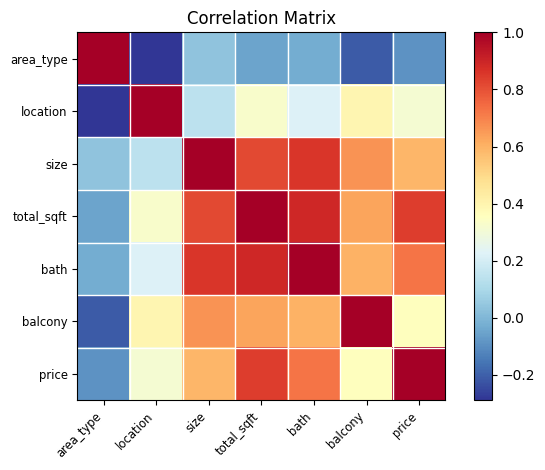

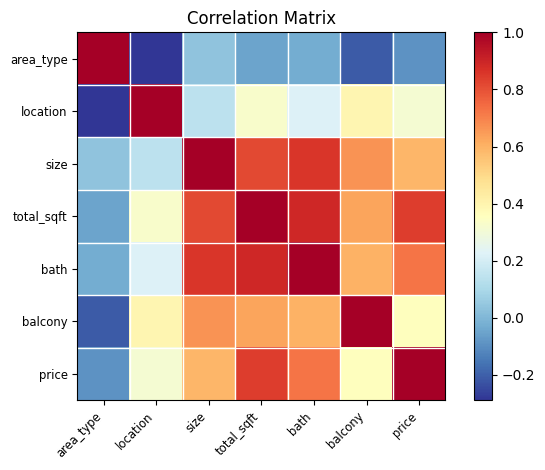

In [80]:
corr_=df.corr()
print(corr_)
sm.graphics.plot_corr(corr_, xnames=list(corr_.columns))

            area_type      size  total_sqft      bath     price
area_type    1.000000  0.033537   -0.051278 -0.028675 -0.090650
size         0.033537  1.000000    0.818638  0.856336  0.591245
total_sqft  -0.051278  0.818638    1.000000  0.892033  0.839790
bath        -0.028675  0.856336    0.892033  1.000000  0.726456
price       -0.090650  0.591245    0.839790  0.726456  1.000000


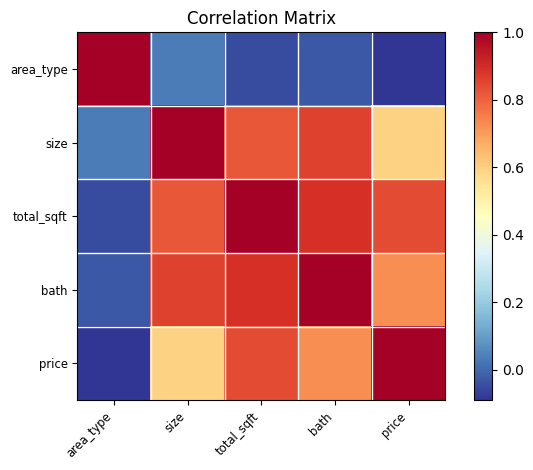

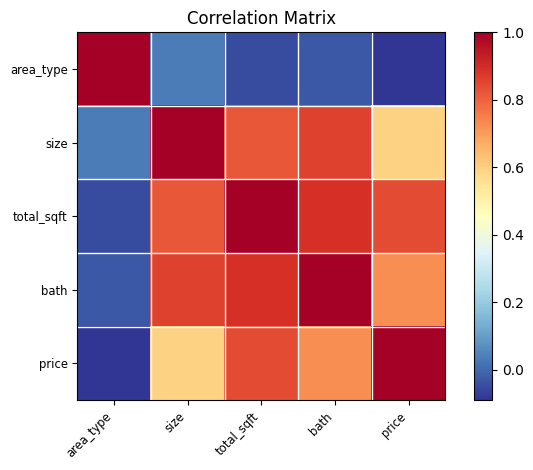

In [81]:
data=df.drop(['location','balcony'], axis=1)
corr=data.corr()
print(corr)
sm.graphics.plot_corr(corr, xnames=list(corr.columns))

            area_type  total_sqft      bath     price
area_type    1.000000   -0.051278 -0.028675 -0.090650
total_sqft  -0.051278    1.000000  0.892033  0.839790
bath        -0.028675    0.892033  1.000000  0.726456
price       -0.090650    0.839790  0.726456  1.000000


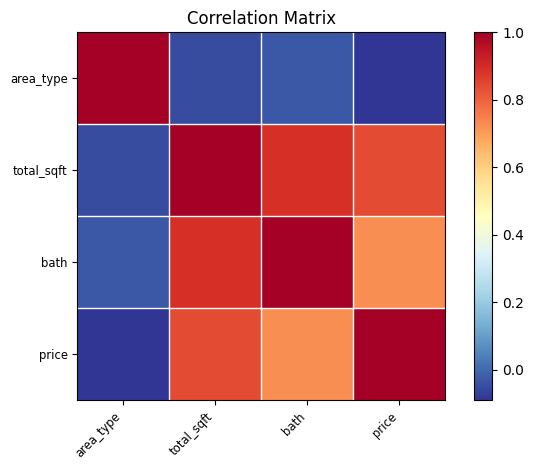

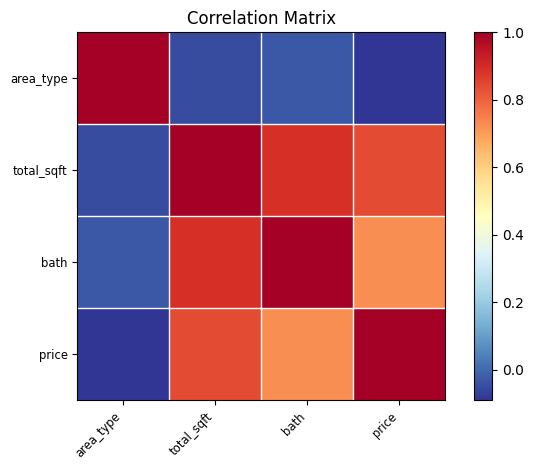

In [94]:
data_=df.drop(['location','balcony','size'], axis=1)
corr=data_.corr()
print(corr)
sm.graphics.plot_corr(corr, xnames=list(corr.columns))

In [82]:
X=data.drop(columns=['price','size'],axis=1).values
y=data['price'].values
model=lm.LinearRegression()
model.fit(X,y)
y_pred=model.predict(X)
print("RMSE: ", r2_score(y,y_pred))

RMSE:  0.7098583952220556


In [83]:
X_=df.drop('price',axis=1).values
y=df['price'].values
model_=lm.LinearRegression()
model_.fit(X_,y)
y_pred=model_.predict(X_)
print("RMSE: ", r2_score(y,y_pred))

RMSE:  0.7735954530600094


In [84]:
data1=df[['total_sqft','area_type','bath']]
X1=data1.values
y=df['price'].values
model=lm.LinearRegression()
model.fit(X1,y)
y_pred=model.predict(X1)
print("RMSE: ", r2_score(y,y_pred))

RMSE:  0.7098583952220556


In [86]:
for i in range(-3,4):
  val=10**i
  svr_clf=SVR(kernel='linear',C=val)
  svr_clf.fit(X1,y)
  y_pr=svr_clf.predict(X1)
  print(f"RMSE({val}): ", r2_score(y,y_pr))

RMSE(0.001):  0.6568502705092076
RMSE(0.01):  0.6567694770404571
RMSE(0.1):  0.6559455619268921
RMSE(1):  0.649258485670037
RMSE(10):  0.6266020711493544
RMSE(100):  0.6263265891208925
RMSE(1000):  0.6569347779970486


In [87]:
for i in range(-3,4):
  val=10**i
  svr_clf=SVR(kernel='linear',C=val)
  svr_clf.fit(X_,y)
  y_pr=svr_clf.predict(X_)
  print(f"RMSE({val}): ", r2_score(y,y_pr))

RMSE(0.001):  0.6568944316526178
RMSE(0.01):  0.6571459600764149
RMSE(0.1):  0.6586007661091093
RMSE(1):  0.6683538858273407
RMSE(10):  0.6666218663407243
RMSE(100):  0.6603041768748987
RMSE(1000):  0.7370260826360204


In [92]:
for i in range(-3,4):
  val1=10**i
  for j in range(-3,4):
    val2=10**j
    svr_clf=SVR(kernel='rbf',C=val1,gamma=val2)
    svr_clf.fit(X_,y)
    y_pr=svr_clf.predict(X_)
    print(f"RMSE(C={val1}; Gamma={val2})  : ", r2_score(y,y_pr))
  val2=0

RMSE(C=0.001; Gamma=0.001)  :  -0.12068868315460457
RMSE(C=0.001; Gamma=0.01)  :  -0.12070172931829859
RMSE(C=0.001; Gamma=0.1)  :  -0.12070623003469638
RMSE(C=0.001; Gamma=1)  :  -0.12070624593434687
RMSE(C=0.001; Gamma=10)  :  -0.12070624593434687
RMSE(C=0.001; Gamma=100)  :  -0.12070624593434687
RMSE(C=0.001; Gamma=1000)  :  -0.12070624593434687
RMSE(C=0.01; Gamma=0.001)  :  -0.12043358300049989
RMSE(C=0.01; Gamma=0.01)  :  -0.12056399124341377
RMSE(C=0.01; Gamma=0.1)  :  -0.12060899549273407
RMSE(C=0.01; Gamma=1)  :  -0.12060915445770948
RMSE(C=0.01; Gamma=10)  :  -0.12060915445770948
RMSE(C=0.01; Gamma=100)  :  -0.12060915445770948
RMSE(C=0.01; Gamma=1000)  :  -0.12060915445770948
RMSE(C=0.1; Gamma=0.001)  :  -0.11790380825008207
RMSE(C=0.1; Gamma=0.01)  :  -0.1191901704783136
RMSE(C=0.1; Gamma=0.1)  :  -0.11963864665251611
RMSE(C=0.1; Gamma=1)  :  -0.11964023314922367
RMSE(C=0.1; Gamma=10)  :  -0.11964023314922367
RMSE(C=0.1; Gamma=100)  :  -0.11964023314922367
RMSE(C=0.1; Gamma=

In [93]:
for i in range(-3,4):
  val1=10**i
  for j in range(-3,4):
    val2=10**j
    svr_clf=SVR(kernel='rbf',C=val1,gamma=val2)
    svr_clf.fit(X1,y)
    y_pr=svr_clf.predict(X1)
    print(f"RMSE(C={val1}; Gamma={val2})  : ", r2_score(y,y_pr))
  val2=0

RMSE(C=0.001; Gamma=0.001)  :  -0.12068787557621863
RMSE(C=0.001; Gamma=0.01)  :  -0.120698671590308
RMSE(C=0.001; Gamma=0.1)  :  -0.12070444272984338
RMSE(C=0.001; Gamma=1)  :  -0.12070610569050366
RMSE(C=0.001; Gamma=10)  :  -0.12070624591862744
RMSE(C=0.001; Gamma=100)  :  -0.12070624593434687
RMSE(C=0.001; Gamma=1000)  :  -0.12070624593434687
RMSE(C=0.01; Gamma=0.001)  :  -0.12042551970626958
RMSE(C=0.01; Gamma=0.01)  :  -0.12053342096102737
RMSE(C=0.01; Gamma=0.1)  :  -0.12059112714516362
RMSE(C=0.01; Gamma=1)  :  -0.12060775304957794
RMSE(C=0.01; Gamma=10)  :  -0.12060915430062069
RMSE(C=0.01; Gamma=100)  :  -0.12060915445770948
RMSE(C=0.01; Gamma=1000)  :  -0.12060915445770948
RMSE(C=0.1; Gamma=0.001)  :  -0.11782666686757581
RMSE(C=0.1; Gamma=0.01)  :  -0.1188882482304694
RMSE(C=0.1; Gamma=0.1)  :  -0.1194604332725846
RMSE(C=0.1; Gamma=1)  :  -0.11962632209803759
RMSE(C=0.1; Gamma=10)  :  -0.11964023158873194
RMSE(C=0.1; Gamma=100)  :  -0.11964023314922367
RMSE(C=0.1; Gamma=100